## Import library

In [1]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install vncorenlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645932 sha256=6b757eefbe08c913775c60fb5a0f36cc2dc4c92febea0fec29d9c78103676021
  Stored in directory: /root/.cache/pip/wheels/5d/d9/b3/41f6c6b1ab758561fd4aab55dc0480b9d7a131c6aaa573a3fa
Successfully built vncorenlp
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install transformers[torch]

Note: you may need to restart the kernel to use updated packages.


In [4]:
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

--2023-11-29 08:59:53--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27412575 (26M) [application/octet-stream]
Saving to: ‘VnCoreNLP-1.1.1.jar’

VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M   157MB/s    in 0.2s    

2023-11-29 08:59:54 (157 MB/s) - ‘VnCoreNLP-1.1.1.jar’ saved [27412575/27412575]

--2023-11-29 08:59:55--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respon

In [5]:
pip install underthesea

  Obtaining dependency information for underthesea from https://files.pythonhosted.org/packages/c0/26/a2615fb23899ec747eaf7d7b3d4ae6b1959b71ae2a8546e121a8ce375d9c/underthesea-6.8.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 14.8 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for underthesea-core==1.0.4 from https://files.pythonhosted.org/packages/3c/7e/b5af0cc8c567e0fc545a897850d8c216df2c2d02f30a52cbe60da252ce92/underthesea_core-1.0.4-cp310-cp310-manylinux2010_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 48.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 45.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
import re
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vncorenlp import VnCoreNLP
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 3. Load model BERT

In [9]:
import torch
from transformers import AutoModel, AutoTokenizer

phobert = AutoModel.from_pretrained("vinai/phobert-base-v2")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")

Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## 4. Connect to Google Drive


In [10]:
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/working/vncorenlp/VnCoreNLP-1.1.1.jar
/kaggle/working/vncorenlp/models/wordsegmenter/vi-vocab
/kaggle/working/vncorenlp/models/wordsegmenter/wordsegmenter.rdr


In [11]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/test-set-spam/test8pt.csv
/kaggle/input/test-set-spam/test10pt.csv
/kaggle/input/test-set-spam/test0cham5pt.csv
/kaggle/input/test-set-spam/test2pt.csv
/kaggle/input/test-set-spam/test1pt.csv
/kaggle/input/test-set-spam/test5pt.csv
/kaggle/input/spam-review/spam/vietnamese-stopwords-dash.txt
/kaggle/input/spam-review/spam/dataset/dev.csv
/kaggle/input/spam-review/spam/dataset/train.csv
/kaggle/input/spam-review/spam/dataset/test.csv


In [12]:
DIR_ROOT = '/kaggle/input/spam-review/spam'
DIR_DATASET = os.path.join(DIR_ROOT, 'dataset')

PATH_TRAIN = os.path.join(DIR_DATASET, 'train.csv')
PATH_DEV = os.path.join(DIR_DATASET, 'dev.csv')

STOPWORDS_PATH = os.path.join(DIR_ROOT, 'vietnamese-stopwords-dash.txt')

MODEL_DIR = os.path.join('/kaggle/working', 'transformer_model')
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)

In [13]:
class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

## 5. Load data

In [14]:
# Assuming PATH_TRAIN is the path to your training data CSV file
train_data = pd.read_csv(PATH_TRAIN)

# Filter rows where 'Label' is 0
train_data = train_data[train_data['Label'] == 0]

# Drop 'SpamLabel' column
train_data = train_data.drop('SpamLabel', axis=1)

# Select features (X) and labels (y)
X = train_data.iloc[:, 0:2]
y = train_data.iloc[:, 2:4]

# Split the data into training and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size=6000, test_size=1500, random_state=42)

In [15]:
vncorenlp = VnCoreNLP("vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m')

In [16]:
with open(STOPWORDS_PATH, "r") as ins:
    stopwords = []
    for line in ins:
        dd = line.strip('\n')
        stopwords.append(dd)
    stopwords = set(stopwords)

In [17]:
def filter_stop_words(train_sentences, stop_words):
    new_sent = [word for word in train_sentences.split() if word not in stop_words]
    train_sentences = ' '.join(new_sent)

    return train_sentences


def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)


def preprocess(text, tokenized=True, lowercased=True):
    # text = ViTokenizer.tokenize(text)
    # text = ' '.join(vncorenlp.tokenize(text)[0])
    text = filter_stop_words(text, stopwords)
    text = deEmojify(text)
    text = text.lower() if lowercased else text
    if tokenized:
        pre_text = ""
        sentences = vncorenlp.tokenize(text)
        for sentence in sentences:
            pre_text += " ".join(sentence)
        text = pre_text
    return text


def pre_process_features(X, y1, tokenized=True, lowercased=True):
    X = np.array(X)
    y1 = np.array(y1)
    X = [preprocess(str(p), tokenized=tokenized, lowercased=lowercased) for p in list(X)]
    for idx, ele in enumerate(X):
        if not ele:
            np.delete(X, idx)
            np.delete(y1, idx)
    return X, y1

In [18]:
train_X, train_y = pre_process_features(X_train['Comment'], y_train['Label'], tokenized=True, lowercased = False)
dev_X, dev_y = pre_process_features(X_dev['Comment'], y_dev['Label'], tokenized=True, lowercased = False)

## Extract embedding

In [19]:
train_encodings = tokenizer(train_X, truncation=True, padding=True, max_length=100)
dev_encodings = tokenizer(dev_X, truncation=True, padding=True, max_length=100)

In [20]:
# Create datasets using the custom BuildDataset class
train_dataset = BuildDataset(train_encodings, torch.tensor(train_y))
dev_dataset = BuildDataset(dev_encodings, torch.tensor(dev_y))

In [21]:
# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)
dev_loader = torch.utils.data.DataLoader(dev_dataset, batch_size=8, shuffle=False)

In [22]:
# Set the device to GPU if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [23]:
# Function to extract embeddings
def extract_embeddings(model, data_loader):
    model.eval()
    model.to(device)
    embeddings = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            # Obtain embeddings from the PhoBERT model
            features = phobert(input_ids, attention_mask=attention_mask)

            # Assuming you want to extract embeddings from the last layer
            last_hidden_states = features.last_hidden_state

            # Append the embeddings to the list
            embeddings.append(last_hidden_states.cpu().numpy())

    # Concatenate the embeddings from different batches
    embeddings = np.concatenate(embeddings, axis=0)
    return embeddings

In [24]:
# Extract embeddings for train, dev, and test datasets
train_embeddings = extract_embeddings(phobert, train_loader)

/tmp/ipykernel_47/3335929433.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
/tmp/ipykernel_47/3335929433.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


In [25]:
dev_embeddings = extract_embeddings(phobert, dev_loader)

/tmp/ipykernel_47/3335929433.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


In [26]:
# Làm phẳng các embeddings
flat_train_embeddings = train_embeddings.reshape(train_embeddings.shape[0], -1)

In [27]:
# Làm phẳng các embeddings cho tập phát triển
flat_dev_embeddings = dev_embeddings.reshape(dev_embeddings.shape[0], -1)

## AutoEncoder

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_size, encoding_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, encoding_size * 8),
            nn.LeakyReLU(),
            nn.Linear(encoding_size * 8, encoding_size * 4),
            nn.LeakyReLU(),
            nn.Linear(encoding_size * 4, encoding_size * 2),
            nn.LeakyReLU(),
            nn.Linear(encoding_size * 2, encoding_size),
            nn.LeakyReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_size, encoding_size * 2),
            nn.LeakyReLU(),
            nn.Linear(encoding_size * 2, encoding_size * 4),
            nn.LeakyReLU(),
            nn.Linear(encoding_size * 4, encoding_size * 8),
            nn.LeakyReLU(),
            nn.Linear(encoding_size * 8, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

input_size = flat_train_embeddings.shape[1]
encoding_size = 64


autoencoder = Autoencoder(input_size, encoding_size)

In [29]:
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

num_epochs = 10
best_loss = float('inf')
patience = 3  # Number of epochs to wait for improvement on validation loss

for epoch in range(num_epochs):
    # Training phase
    inputs = torch.tensor(flat_train_embeddings, dtype=torch.float32)
    outputs = autoencoder(inputs)
    train_loss = criterion(outputs, inputs)

    # Validation phase
    with torch.no_grad():
        dev_inputs = torch.tensor(flat_dev_embeddings, dtype=torch.float32)
        dev_outputs = autoencoder(dev_inputs)
        val_loss = criterion(dev_outputs, dev_inputs)

    # Print training and validation losses
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

    # Check for improvement on validation loss
    if val_loss < best_loss:
        best_loss = val_loss
        # Save the model or update some other checkpoint

        # Reset patience
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

Epoch 1/10, Train Loss: 0.3007, Val Loss: 0.3007
Epoch 2/10, Train Loss: 0.2982, Val Loss: 0.2982
Epoch 3/10, Train Loss: 0.2846, Val Loss: 0.2846
Epoch 4/10, Train Loss: 0.2366, Val Loss: 0.2367
Epoch 5/10, Train Loss: 0.1506, Val Loss: 0.1507
Epoch 6/10, Train Loss: 0.0908, Val Loss: 0.0908
Epoch 7/10, Train Loss: 0.0767, Val Loss: 0.0768
Epoch 8/10, Train Loss: 0.0739, Val Loss: 0.0739
Epoch 9/10, Train Loss: 0.0737, Val Loss: 0.0737
Epoch 10/10, Train Loss: 0.0755, Val Loss: 0.0755


### Testset 2% label 1

In [30]:
PATH_TEST = os.path.join('/kaggle/input/test-set-spam', 'test2pt.csv')
test_data = pd.read_csv(PATH_TEST)
X_test = test_data.iloc[:, 2:3]
y_test = test_data.iloc[:, 3:4]

In [31]:
test_X, test_y = pre_process_features(X_test['Comment'], y_test['Label'], tokenized=True, lowercased = False)
test_encodings = tokenizer(test_X, truncation=True, padding=True, max_length=100)
test_dataset = BuildDataset(test_encodings, torch.tensor(test_y))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)
test_embeddings = extract_embeddings(phobert, test_loader)
# Làm phẳng các embeddings cho tập kiểm thử
flat_test_embeddings = test_embeddings.reshape(test_embeddings.shape[0], -1)

/tmp/ipykernel_47/3335929433.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


In [32]:
# Áp dụng mô hình cho dữ liệu kiểm tra
test_inputs = torch.tensor(flat_test_embeddings, dtype=torch.float32)
test_outputs = autoencoder(test_inputs)

# Tính sự lệch giữa đầu ra tái tạo và đầu vào
reconstruction_error = torch.mean((test_outputs - test_inputs)**2, dim=1).detach().numpy()

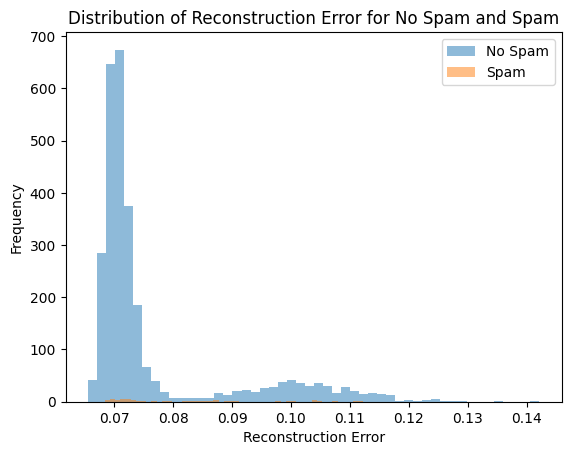

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Tách reconstruction_error thành 2 nhóm dữ liệu no-spam (0) và spam (1)
reconstruction_error_no_spam = reconstruction_error[y_test['Label'] == 0]
reconstruction_error_spam = reconstruction_error[y_test['Label'] == 1]

# Vẽ biểu đồ histogram phân phối của no-spam và spam
plt.hist(reconstruction_error_no_spam, bins=50, alpha=0.5, label='No Spam')
plt.hist(reconstruction_error_spam, bins=50, alpha=0.5, label='Spam')
plt.title('Distribution of Reconstruction Error for No Spam and Spam')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [34]:
# Assume you have a list of candidate thresholds to test
thresholds_to_test = np.linspace(0, 1, num=100)  # You can adjust the number of thresholds

best_accuracy = 0
best_threshold = 0

for threshold in thresholds_to_test:
    predictions = (reconstruction_error > threshold).astype(int)
    
    accuracy = accuracy_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    f1 = f1_score(test_y, predictions)
    
    # You can use a combination of metrics to decide the "best" threshold
    # For example, maximize accuracy and F1 score, and minimize the difference with recall
    
    combined_metric = accuracy + f1 - abs(recall - 0.8)  # You can adjust this combination
    
    if combined_metric > best_accuracy:
        best_accuracy = combined_metric
        best_threshold = threshold

# After the loop, you can use the best threshold to make final predictions
final_predictions = (reconstruction_error > best_threshold).astype(int)

# Evaluate final predictions
final_accuracy = accuracy_score(test_y, final_predictions)
final_recall = recall_score(test_y, final_predictions)
final_f1 = f1_score(test_y, final_predictions)
final_confusion_mat = confusion_matrix(test_y, final_predictions)

print(f'Best Threshold: {best_threshold:.4f}')
print(f'Final Accuracy: {final_accuracy:.4f}')
print(f'Final Recall: {final_recall:.4f}')
print(f'Final F1 Score: {final_f1:.4f}')
print(f'Final Confusion Matrix:\n{final_confusion_mat}')

Best Threshold: 0.0808
Final Accuracy: 0.8085
Final Recall: 0.4828
Final F1 Score: 0.0909
Final Confusion Matrix:
[[2337  530]
 [  30   28]]


In [35]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(test_y, final_predictions)
recall = recall_score(test_y, final_predictions)

print("Precision (percentage of review labeled as spam that were correct): {:.2f}%".format(100 * precision))

print("Recall (percentage of spam review caught successfully): {:.2f}%".format(100 * recall))

Precision (percentage of review labeled as spam that were correct): 5.02%
Recall (percentage of spam review caught successfully): 48.28%


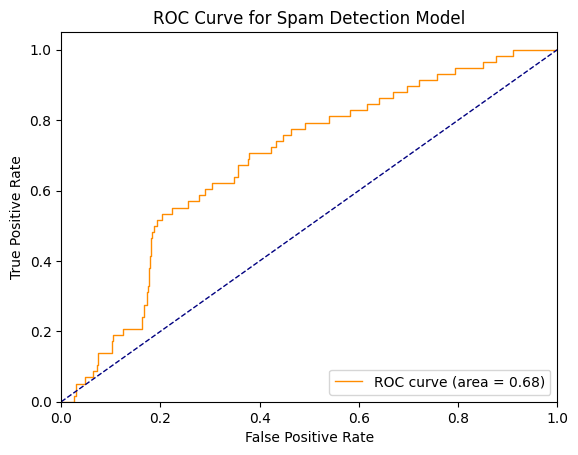

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_y, reconstruction_error) 
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Spam Detection Model')
plt.legend(loc="lower right")
plt.show()

### Testset 1% label 1

In [37]:
PATH_TEST = os.path.join('/kaggle/input/test-set-spam', 'test1pt.csv')
test_data = pd.read_csv(PATH_TEST)
X_test = test_data.iloc[:, 2:3]
y_test = test_data.iloc[:, 3:4]

In [38]:
test_X, test_y = pre_process_features(X_test['Comment'], y_test['Label'], tokenized=True, lowercased = False)
test_encodings = tokenizer(test_X, truncation=True, padding=True, max_length=100)
test_dataset = BuildDataset(test_encodings, torch.tensor(test_y))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)
test_embeddings = extract_embeddings(phobert, test_loader)
# Làm phẳng các embeddings cho tập kiểm thử
flat_test_embeddings = test_embeddings.reshape(test_embeddings.shape[0], -1)

/tmp/ipykernel_47/3335929433.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


In [39]:
# Áp dụng mô hình cho dữ liệu kiểm tra
test_inputs = torch.tensor(flat_test_embeddings, dtype=torch.float32)
test_outputs = autoencoder(test_inputs)

# Tính sự lệch giữa đầu ra tái tạo và đầu vào
reconstruction_error = torch.mean((test_outputs - test_inputs)**2, dim=1).detach().numpy()

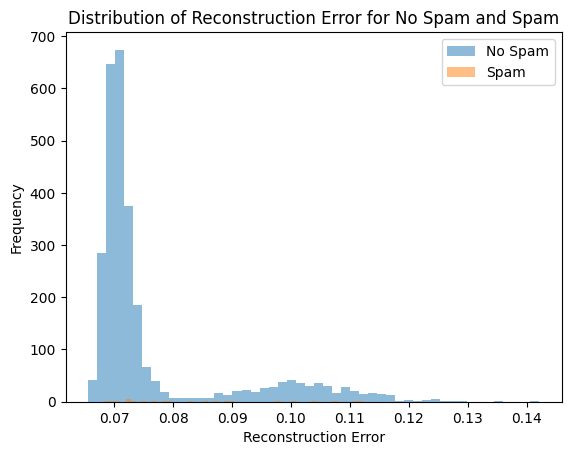

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Tách reconstruction_error thành 2 nhóm dữ liệu no-spam (0) và spam (1)
reconstruction_error_no_spam = reconstruction_error[y_test['Label'] == 0]
reconstruction_error_spam = reconstruction_error[y_test['Label'] == 1]

# Vẽ biểu đồ histogram phân phối của no-spam và spam
plt.hist(reconstruction_error_no_spam, bins=50, alpha=0.5, label='No Spam')
plt.hist(reconstruction_error_spam, bins=50, alpha=0.5, label='Spam')
plt.title('Distribution of Reconstruction Error for No Spam and Spam')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [41]:
# Assume you have a list of candidate thresholds to test
thresholds_to_test = np.linspace(0, 1, num=100)  # You can adjust the number of thresholds

best_accuracy = 0
best_threshold = 0

for threshold in thresholds_to_test:
    predictions = (reconstruction_error > threshold).astype(int)
    
    accuracy = accuracy_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    f1 = f1_score(test_y, predictions)
    
    # You can use a combination of metrics to decide the "best" threshold
    # For example, maximize accuracy and F1 score, and minimize the difference with recall
    
    combined_metric = accuracy + f1 - abs(recall - 0.8)  # You can adjust this combination
    
    if combined_metric > best_accuracy:
        best_accuracy = combined_metric
        best_threshold = threshold

# After the loop, you can use the best threshold to make final predictions
final_predictions = (reconstruction_error > best_threshold).astype(int)

# Evaluate final predictions
final_accuracy = accuracy_score(test_y, final_predictions)
final_recall = recall_score(test_y, final_predictions)
final_f1 = f1_score(test_y, final_predictions)
final_confusion_mat = confusion_matrix(test_y, final_predictions)

print(f'Best Threshold: {best_threshold:.4f}')
print(f'Final Accuracy: {final_accuracy:.4f}')
print(f'Final Recall: {final_recall:.4f}')
print(f'Final F1 Score: {final_f1:.4f}')
print(f'Final Confusion Matrix:\n{final_confusion_mat}')

Best Threshold: 0.0808
Final Accuracy: 0.8117
Final Recall: 0.4643
Final F1 Score: 0.0455
Final Confusion Matrix:
[[2337  530]
 [  15   13]]


In [42]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(test_y, final_predictions)
recall = recall_score(test_y, final_predictions)

print("Precision (percentage of review labeled as spam that were correct): {:.2f}%".format(100 * precision))

print("Recall (percentage of spam review caught successfully): {:.2f}%".format(100 * recall))

Precision (percentage of review labeled as spam that were correct): 2.39%
Recall (percentage of spam review caught successfully): 46.43%


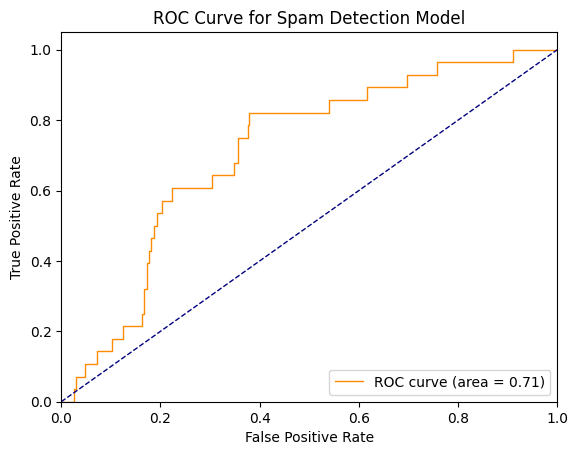

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_y, reconstruction_error) 
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Spam Detection Model')
plt.legend(loc="lower right")
plt.show()

### Testset 0.5% label 1

In [44]:
PATH_TEST = os.path.join('/kaggle/input/test-set-spam', 'test0cham5pt.csv')
test_data = pd.read_csv(PATH_TEST)
X_test = test_data.iloc[:, 2:3]
y_test = test_data.iloc[:, 3:4]

In [45]:
test_X, test_y = pre_process_features(X_test['Comment'], y_test['Label'], tokenized=True, lowercased = False)
test_encodings = tokenizer(test_X, truncation=True, padding=True, max_length=100)
test_dataset = BuildDataset(test_encodings, torch.tensor(test_y))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)
test_embeddings = extract_embeddings(phobert, test_loader)
# Làm phẳng các embeddings cho tập kiểm thử
flat_test_embeddings = test_embeddings.reshape(test_embeddings.shape[0], -1)

/tmp/ipykernel_47/3335929433.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


In [46]:
# Áp dụng mô hình cho dữ liệu kiểm tra
test_inputs = torch.tensor(flat_test_embeddings, dtype=torch.float32)
test_outputs = autoencoder(test_inputs)

# Tính sự lệch giữa đầu ra tái tạo và đầu vào
reconstruction_error = torch.mean((test_outputs - test_inputs)**2, dim=1).detach().numpy()

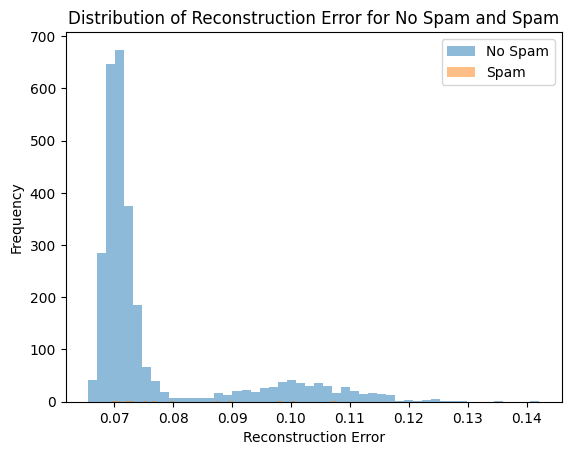

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Tách reconstruction_error thành 2 nhóm dữ liệu no-spam (0) và spam (1)
reconstruction_error_no_spam = reconstruction_error[y_test['Label'] == 0]
reconstruction_error_spam = reconstruction_error[y_test['Label'] == 1]

# Vẽ biểu đồ histogram phân phối của no-spam và spam
plt.hist(reconstruction_error_no_spam, bins=50, alpha=0.5, label='No Spam')
plt.hist(reconstruction_error_spam, bins=50, alpha=0.5, label='Spam')
plt.title('Distribution of Reconstruction Error for No Spam and Spam')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [48]:
# Assume you have a list of candidate thresholds to test
thresholds_to_test = np.linspace(0, 1, num=100)  # You can adjust the number of thresholds

best_accuracy = 0
best_threshold = 0

for threshold in thresholds_to_test:
    predictions = (reconstruction_error > threshold).astype(int)
    
    accuracy = accuracy_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    f1 = f1_score(test_y, predictions)
    
    # You can use a combination of metrics to decide the "best" threshold
    # For example, maximize accuracy and F1 score, and minimize the difference with recall
    
    combined_metric = accuracy + f1 - abs(recall - 0.8)  # You can adjust this combination
    
    if combined_metric > best_accuracy:
        best_accuracy = combined_metric
        best_threshold = threshold

# After the loop, you can use the best threshold to make final predictions
final_predictions = (reconstruction_error > best_threshold).astype(int)

# Evaluate final predictions
final_accuracy = accuracy_score(test_y, final_predictions)
final_recall = recall_score(test_y, final_predictions)
final_f1 = f1_score(test_y, final_predictions)
final_confusion_mat = confusion_matrix(test_y, final_predictions)

print(f'Best Threshold: {best_threshold:.4f}')
print(f'Final Accuracy: {final_accuracy:.4f}')
print(f'Final Recall: {final_recall:.4f}')
print(f'Final F1 Score: {final_f1:.4f}')
print(f'Final Confusion Matrix:\n{final_confusion_mat}')

Best Threshold: 0.0707
Final Accuracy: 0.4301
Final Recall: 0.7857
Final F1 Score: 0.0132
Final Confusion Matrix:
[[1228 1639]
 [   3   11]]


In [49]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(test_y, final_predictions)
recall = recall_score(test_y, final_predictions)

print("Precision (percentage of review labeled as spam that were correct): {:.2f}%".format(100 * precision))

print("Recall (percentage of spam review caught successfully): {:.2f}%".format(100 * recall))

Precision (percentage of review labeled as spam that were correct): 0.67%
Recall (percentage of spam review caught successfully): 78.57%


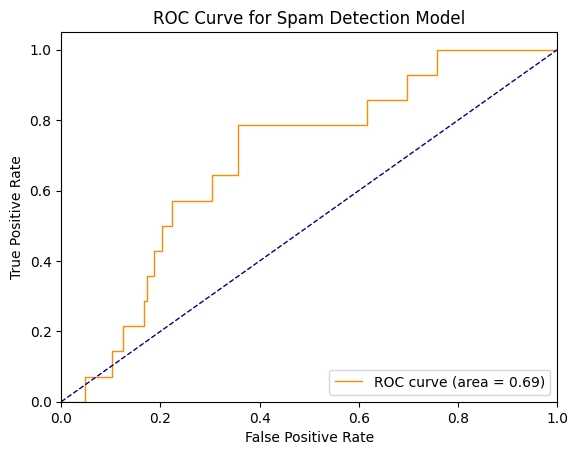

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_y, reconstruction_error) 
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Spam Detection Model')
plt.legend(loc="lower right")
plt.show()

## Testset 27% label 1

In [51]:
PATH_TEST = os.path.join('/kaggle/input/spam-review/spam/dataset', 'test.csv')
test_data = pd.read_csv(PATH_TEST)
X_test = test_data.iloc[:, 0:2]
y_test = test_data.iloc[:, 2:4]

In [52]:
test_X, test_y = pre_process_features(X_test['Comment'], y_test['Label'], tokenized=True, lowercased = False)
test_encodings = tokenizer(test_X, truncation=True, padding=True, max_length=100)
test_dataset = BuildDataset(test_encodings, torch.tensor(test_y))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)
test_embeddings = extract_embeddings(phobert, test_loader)
# Làm phẳng các embeddings cho tập kiểm thử
flat_test_embeddings = test_embeddings.reshape(test_embeddings.shape[0], -1)

/tmp/ipykernel_47/3335929433.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


In [53]:
# Áp dụng mô hình cho dữ liệu kiểm tra
test_inputs = torch.tensor(flat_test_embeddings, dtype=torch.float32)
test_outputs = autoencoder(test_inputs)

# Tính sự lệch giữa đầu ra tái tạo và đầu vào
reconstruction_error = torch.mean((test_outputs - test_inputs)**2, dim=1).detach().numpy()

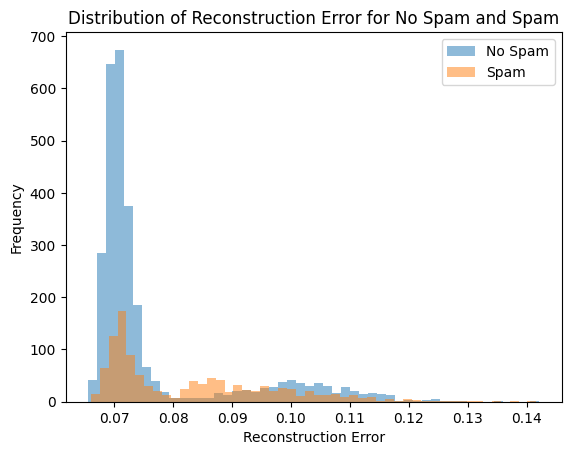

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Tách reconstruction_error thành 2 nhóm dữ liệu no-spam (0) và spam (1)
reconstruction_error_no_spam = reconstruction_error[y_test['Label'] == 0]
reconstruction_error_spam = reconstruction_error[y_test['Label'] == 1]

# Vẽ biểu đồ histogram phân phối của no-spam và spam
plt.hist(reconstruction_error_no_spam, bins=50, alpha=0.5, label='No Spam')
plt.hist(reconstruction_error_spam, bins=50, alpha=0.5, label='Spam')
plt.title('Distribution of Reconstruction Error for No Spam and Spam')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [55]:
# Assume you have a list of candidate thresholds to test
thresholds_to_test = np.linspace(0, 1, num=100)  # You can adjust the number of thresholds

best_accuracy = 0
best_threshold = 0

for threshold in thresholds_to_test:
    predictions = (reconstruction_error > threshold).astype(int)
    
    accuracy = accuracy_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    f1 = f1_score(test_y, predictions)
    
    # You can use a combination of metrics to decide the "best" threshold
    # For example, maximize accuracy and F1 score, and minimize the difference with recall
    
    combined_metric = accuracy + f1 - abs(recall - 0.8)  # You can adjust this combination
    
    if combined_metric > best_accuracy:
        best_accuracy = combined_metric
        best_threshold = threshold

# After the loop, you can use the best threshold to make final predictions
final_predictions = (reconstruction_error > best_threshold).astype(int)

# Evaluate final predictions
final_accuracy = accuracy_score(test_y, final_predictions)
final_recall = recall_score(test_y, final_predictions)
final_f1 = f1_score(test_y, final_predictions)
final_confusion_mat = confusion_matrix(test_y, final_predictions)

print(f'Best Threshold: {best_threshold:.4f}')
print(f'Final Accuracy: {final_accuracy:.4f}')
print(f'Final Recall: {final_recall:.4f}')
print(f'Final F1 Score: {final_f1:.4f}')
print(f'Final Confusion Matrix:\n{final_confusion_mat}')

Best Threshold: 0.0707
Final Accuracy: 0.5312
Final Recall: 0.7977
Final F1 Score: 0.4866
Final Confusion Matrix:
[[1228 1639]
 [ 224  883]]


In [56]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(test_y, final_predictions)
recall = recall_score(test_y, final_predictions)

print("Precision (percentage of review labeled as spam that were correct): {:.2f}%".format(100 * precision))

print("Recall (percentage of spam review caught successfully): {:.2f}%".format(100 * recall))

Precision (percentage of review labeled as spam that were correct): 35.01%
Recall (percentage of spam review caught successfully): 79.77%


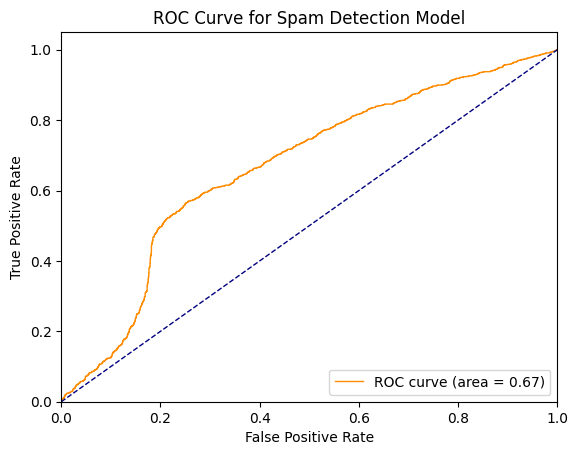

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_y, reconstruction_error) 
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Spam Detection Model')
plt.legend(loc="lower right")
plt.show()

### Testset 8% label 1

In [58]:
PATH_TEST = os.path.join('/kaggle/input/test-set-spam', 'test8pt.csv')
test_data = pd.read_csv(PATH_TEST)
X_test = test_data.iloc[:, 2:3]
y_test = test_data.iloc[:, 3:4]

In [59]:
test_X, test_y = pre_process_features(X_test['Comment'], y_test['Label'], tokenized=True, lowercased = False)
test_encodings = tokenizer(test_X, truncation=True, padding=True, max_length=100)
test_dataset = BuildDataset(test_encodings, torch.tensor(test_y))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)
test_embeddings = extract_embeddings(phobert, test_loader)
# Làm phẳng các embeddings cho tập kiểm thử
flat_test_embeddings = test_embeddings.reshape(test_embeddings.shape[0], -1)

/tmp/ipykernel_47/3335929433.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


In [60]:
# Áp dụng mô hình cho dữ liệu kiểm tra
test_inputs = torch.tensor(flat_test_embeddings, dtype=torch.float32)
test_outputs = autoencoder(test_inputs)

# Tính sự lệch giữa đầu ra tái tạo và đầu vào
reconstruction_error = torch.mean((test_outputs - test_inputs)**2, dim=1).detach().numpy()

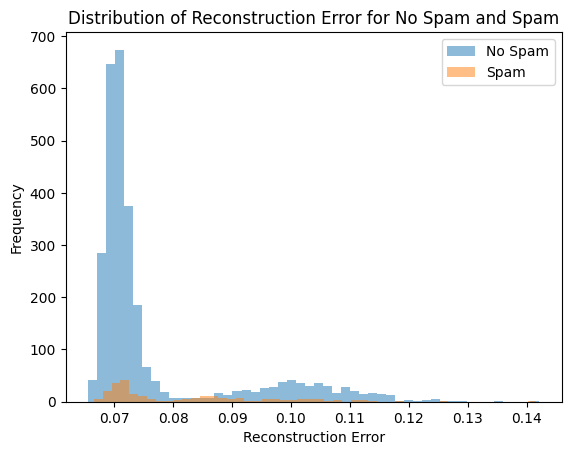

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Tách reconstruction_error thành 2 nhóm dữ liệu no-spam (0) và spam (1)
reconstruction_error_no_spam = reconstruction_error[y_test['Label'] == 0]
reconstruction_error_spam = reconstruction_error[y_test['Label'] == 1]

# Vẽ biểu đồ histogram phân phối của no-spam và spam
plt.hist(reconstruction_error_no_spam, bins=50, alpha=0.5, label='No Spam')
plt.hist(reconstruction_error_spam, bins=50, alpha=0.5, label='Spam')
plt.title('Distribution of Reconstruction Error for No Spam and Spam')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [62]:
# Assume you have a list of candidate thresholds to test
thresholds_to_test = np.linspace(0, 1, num=100)  # You can adjust the number of thresholds

best_accuracy = 0
best_threshold = 0

for threshold in thresholds_to_test:
    predictions = (reconstruction_error > threshold).astype(int)
    
    accuracy = accuracy_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    f1 = f1_score(test_y, predictions)
    
    # You can use a combination of metrics to decide the "best" threshold
    # For example, maximize accuracy and F1 score, and minimize the difference with recall
    
    combined_metric = accuracy + f1 - abs(recall - 0.8)  # You can adjust this combination
    
    if combined_metric > best_accuracy:
        best_accuracy = combined_metric
        best_threshold = threshold

# After the loop, you can use the best threshold to make final predictions
final_predictions = (reconstruction_error > best_threshold).astype(int)

# Evaluate final predictions
final_accuracy = accuracy_score(test_y, final_predictions)
final_recall = recall_score(test_y, final_predictions)
final_f1 = f1_score(test_y, final_predictions)
final_confusion_mat = confusion_matrix(test_y, final_predictions)

print(f'Best Threshold: {best_threshold:.4f}')
print(f'Final Accuracy: {final_accuracy:.4f}')
print(f'Final Recall: {final_recall:.4f}')
print(f'Final F1 Score: {final_f1:.4f}')
print(f'Final Confusion Matrix:\n{final_confusion_mat}')

Best Threshold: 0.0808
Final Accuracy: 0.7853
Final Recall: 0.4418
Final F1 Score: 0.2475
Final Confusion Matrix:
[[2337  530]
 [ 139  110]]


In [63]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(test_y, final_predictions)
recall = recall_score(test_y, final_predictions)

print("Precision (percentage of review labeled as spam that were correct): {:.2f}%".format(100 * precision))

print("Recall (percentage of spam review caught successfully): {:.2f}%".format(100 * recall))

Precision (percentage of review labeled as spam that were correct): 17.19%
Recall (percentage of spam review caught successfully): 44.18%


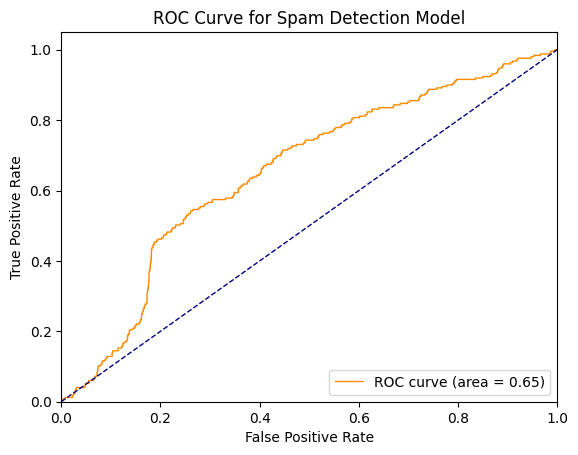

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_y, reconstruction_error) 
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Spam Detection Model')
plt.legend(loc="lower right")
plt.show()